**Task 3:Customer Segmentation / Clustering.**

Perform customer segmentation using clustering techniques.
Use both profile information
(from Customers.csv) and transaction information (from Transactions.csv).

● You have the flexibility to choose any clustering algorithm and any number of clusters in between(2 and 10)

● Calculate clustering metrics, including the DB Index(Evaluation will be done on this)

● Visualise your clusters using relevant plots.

Deliverables:

● A report on your clustering results, including:

* The number of clusters formed.
* DB Index value.
* Other relevant clustering metrics.

● A Jupyter Notebook/Python script containing your clustering code.

Evaluation Criteria:

● Clustering logic and metrics.

● Visual representation of clusters.

Clusters: 2, DB Index: 0.7234
Clusters: 3, DB Index: 0.7727
Clusters: 4, DB Index: 0.8651
Clusters: 5, DB Index: 0.8967
Clusters: 6, DB Index: 0.9321
Clusters: 7, DB Index: 0.9285
Clusters: 8, DB Index: 0.9217
Clusters: 9, DB Index: 1.0765
Clusters: 10, DB Index: 1.0320

Optimal Number of Clusters: 2


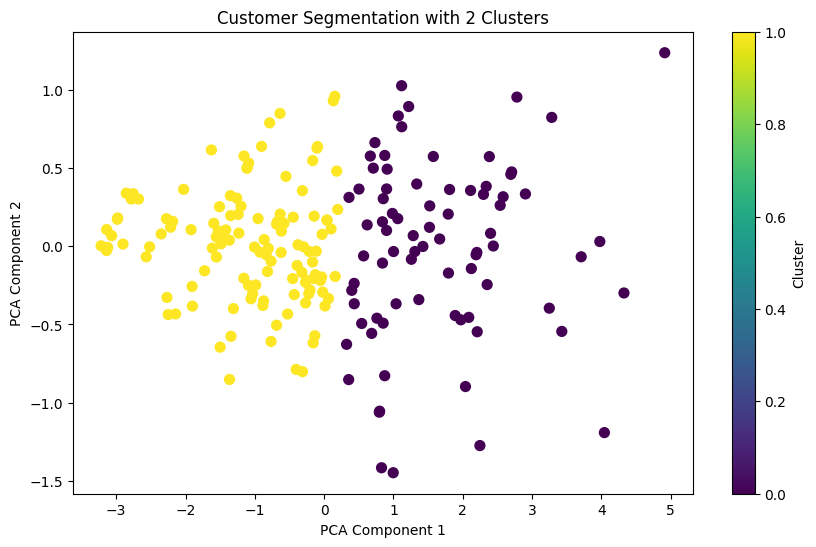


Clustered Customer Profiles:
  CustomerID  TotalValue  Quantity  TransactionID  Cluster
0      C0001     3354.52        12              5        1
1      C0002     1862.74        10              4        1
2      C0003     2725.38        14              4        1
3      C0004     5354.88        23              8        0
4      C0005     2034.24         7              3        1


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Load datasets
customers = pd.read_csv("/content/drive/MyDrive/ZEOTAP/Customers.csv")
transactions = pd.read_csv("/content/drive/MyDrive/ZEOTAP/Transactions.csv")

# Merge Transactions with Customers to get customer details
customer_data = transactions.merge(customers, on='CustomerID', how='left')

# Aggregate data to create customer profiles
customer_profiles = customer_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spend by customer
    'Quantity': 'sum',    # Total quantity purchased
    'TransactionID': 'count',  # Total number of transactions
}).reset_index()

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_profiles[['TotalValue', 'Quantity', 'TransactionID']])

# Loop through different numbers of clusters and calculate DB Index
cluster_range = range(2, 11)
db_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    db_index = davies_bouldin_score(scaled_data, labels)
    db_scores.append(db_index)
    print(f"Clusters: {n_clusters}, DB Index: {db_index:.4f}")

# Find the optimal number of clusters (lowest DB Index)
optimal_clusters = cluster_range[db_scores.index(min(db_scores))]
print(f"\nOptimal Number of Clusters: {optimal_clusters}")

# Perform clustering using the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=customer_profiles['Cluster'], cmap='viridis', s=50)
plt.title(f'Customer Segmentation with {optimal_clusters} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Print the clustering results
print("\nClustered Customer Profiles:")
print(customer_profiles.head())


Davies-Bouldin Index for 2 Clusters: 0.6884


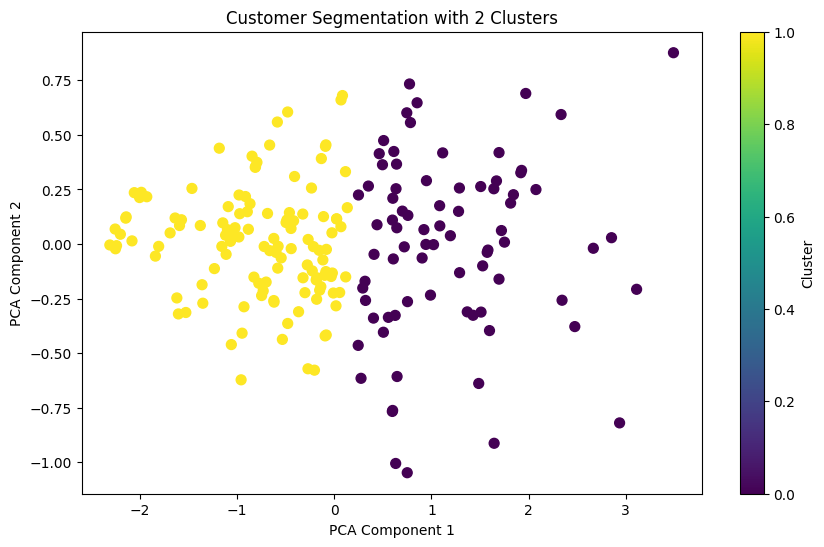


Clustered Customer Profiles:
  CustomerID  TotalValue  Quantity  TransactionID  Cluster
0      C0001     3354.52        12              5        1
1      C0002     1862.74        10              4        1
2      C0003     2725.38        14              4        1
3      C0004     5354.88        23              8        0
4      C0005     2034.24         7              3        1


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Load datasets
customers = pd.read_csv("/content/drive/MyDrive/ZEOTAP/Customers.csv")
transactions = pd.read_csv("/content/drive/MyDrive/ZEOTAP/Transactions.csv")

# Merge Transactions with Customers to get customer details
customer_data = transactions.merge(customers, on='CustomerID', how='left')

# Aggregate data to create customer profiles
customer_profiles = customer_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spend by customer
    'Quantity': 'sum',    # Total quantity purchased
    'TransactionID': 'count',  # Total number of transactions
}).reset_index()

# Apply RobustScaler to handle potential outliers
scaler = RobustScaler()
scaled_data = scaler.fit_transform(customer_profiles[['TotalValue', 'Quantity', 'TransactionID']])

# Apply PCA for dimensionality reduction (retain 95% of variance)
pca = PCA(n_components=0.95, random_state=42)
pca_data = pca.fit_transform(scaled_data)

# Perform KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(pca_data)

# Calculate Davies-Bouldin Score
db_score = davies_bouldin_score(pca_data, customer_profiles['Cluster'])
print(f"Davies-Bouldin Index for 2 Clusters: {db_score:.4f}")

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=customer_profiles['Cluster'], cmap='viridis', s=50)
plt.title('Customer Segmentation with 2 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Print the clustering results
print("\nClustered Customer Profiles:")
print(customer_profiles.head())